## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  


In [15]:
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from pprint import pprint

consumer_key = "IM0MM9EIYEznGPI8dwzvRdJor"
consumer_secret = "Eal8dLME44hmfVhRn04GZOJyAjPKbh1d8mUc20gyJIvVCDgIPD"
access_token = "969400511928479744-CeLxAAwtNY55VPZCctXwx7ODuNcsLcG"
access_token_secret = "jIprrB3mLX2Q64KqkxqOvi0Arvw9RR8ESWPU1UxlZWIZY"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [16]:
#create a list for all target user accounts
target_users = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
sentiments = []

for users in target_users:
    for x in range(5):
        all_tweets = api.user_timeline(users, page=x)
        for tweet in all_tweets:
            #tweet_times = []
            tweet_text = tweet["text"].lower()
            #tweet_times.append(tweet["created_at"])
            #tweet_time_objects = []
            #for x in range(len(tweet_times)):
                #tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
                #tweet_time_objects.append(tweet_datetime)
                # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet_text)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            #print scores for each tweet, all 100 tweets            
            print(f"User: {users}")
            print(tweet_text)
            print("Compound Score:", compound)
            print("Positive Score:", pos)
            print("Neutral Score:", neu)
            print("Negative Score: ", neg)
            print()
            sentiments.append({"User": users,
                               "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweet Count": len(compound_list)
                                })
    sentiments_df = pd.DataFrame.from_dict(sentiments)
    sentiments_df.head(20)     

User: @BBC
'harry was looking at his family for the first time in his life'. 

💛⚡️✨ david thewlis reading #harrypotter is trul… https://t.co/waycdfvrx2
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @BBC
✂️ ‘my hair is a symbol of pride.’

💇🏽💇🏿💇🏾 six stories about black women's hair.
👉 https://t.co/nfnvgpkpvi https://t.co/v1qrrjzwfu
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @BBC
the little mouse that inspired pikachu is actually a rabbit! https://t.co/axoqoak4ds
Compound Score: 0.4987
Positive Score: 0.264
Neutral Score: 0.736
Negative Score:  0.0

User: @BBC
rt @bbctwo: if you haven't seen #acsversace yet, penélope cruz as donatella versace is everything... https://t.co/lh9kfrgqo2
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @BBC
rt @bbcbreakfast: in many ways hedy lamarr was the archetypal hollywood starlet, but the austrian born actress was also an inventor 

User: @BBC
rt @bbc5live: what happens to your old paint?

a scheme in leeds to recycle unused paint has saved hundreds of tons of leftovers from endin…
Compound Score: 0.4215
Positive Score: 0.109
Neutral Score: 0.891
Negative Score:  0.0

User: @BBC
rt @bbctwo: when this father and daughter paddled into the sea, they had no idea how much danger they were in... #savinglivesatsea https://…
Compound Score: -0.6808
Positive Score: 0.0
Neutral Score: 0.789
Negative Score:  0.211

User: @BBC
rt @cbbc: there are over 128,000 children in the uk without a home.

watch cbbc's powerful documentary about homeless children on @bbciplay…
Compound Score: 0.4215
Positive Score: 0.123
Neutral Score: 0.877
Negative Score:  0.0

User: @BBC
dirty water kills millions every year. 

but one ingenious invention can remove dangerous microbes as they flow tow… https://t.co/isjxunr3dp
Compound Score: -0.81
Positive Score: 0.0
Neutral Score: 0.657
Negative Score:  0.343

User: @BBC
la dame de brassempouy is a b

User: @BBC
rt @bbccornwall: it's #stpiransday - so cheers to everyone! #goolperanlowen 🌮

bit of fun .. complete this sentence "you know you're #corni…
Compound Score: 0.8384
Positive Score: 0.345
Neutral Score: 0.655
Negative Score:  0.0

User: @BBC
rt @bbc6music: 🥟 gool peran lowen / happy #stpiransday to all of our 
‘ansom cornish listeners. 

to celebrate gwenno is in session for @la…
Compound Score: 0.8126
Positive Score: 0.27
Neutral Score: 0.73
Negative Score:  0.0

User: @BBC
rt @bbcrd: available now! 📲 download the #civilisations augmented reality app @bbctaster to explore classic art, objects, and artefacts fro…
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @BBC
rt @bbcradio2: what'sthe first leg of @zoetheball's epic sport relief challenge? 🚲 she updates @achrisevans on #hardestroadhome @sportrelie…
Compound Score: 0.5267
Positive Score: 0.227
Neutral Score: 0.773
Negative Score:  0.0

User: @BBC
🎭🎬#oscars outfits designed to dazzle -

User: @CBS
rt @thegoodfight: meticulously constructed. soapy &amp; sexy. intoxicating, savage television. 🔥 here's what critics are saying about #thegoodf…
Compound Score: -0.2023
Positive Score: 0.15
Neutral Score: 0.619
Negative Score:  0.23

User: @CBS
this just in! @jason_aldean, @mirandalambert, @lukebryanonline, and many more are set to perform at the 53rd academ… https://t.co/mfxw2vxzu4
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CBS
meet the ensemble of talented actors slated to join $1, a new mystery series coming to cbs all access:… https://t.co/qoyyv7vxwg
Compound Score: 0.6705
Positive Score: 0.244
Neutral Score: 0.756
Negative Score:  0.0

User: @CBS
will @jason_aldean, @garthbrooks, @lukebryanonline, @chrisstapleton, or @keithurban be named entertainer of the yea… https://t.co/rmd8zjex3s
Compound Score: 0.3818
Positive Score: 0.167
Neutral Score: 0.833
Negative Score:  0.0

User: @CBS
rt @thegoodfight: it feels good to be back. 

User: @CBS
rt @livinbiblically: while chip's sticking to the bible's original rules, the cast of #livingbiblically has given them a more modern makeov…
Compound Score: 0.3182
Positive Score: 0.108
Neutral Score: 0.892
Negative Score:  0.0

User: @CBS
casting news! peter mark kendall, michael gaston, greg wise, rade šerbedžija, zack pearlman, and keye chen join the… https://t.co/gfob2krd8h
Compound Score: 0.68
Positive Score: 0.248
Neutral Score: 0.752
Negative Score:  0.0

User: @CBS
rt @bullcbs: the verdict is in...#bull is the perfect valentine! ❤️ happy #valentinesday! https://t.co/poeeji4anc
Compound Score: 0.8619
Positive Score: 0.466
Neutral Score: 0.534
Negative Score:  0.0

User: @CBS
rt @noactivitycbs: car 27 reporting: season 2 of #noactivity coming soon!

binge season one now on cbs all access: https://t.co/yvxoqmeyhn…
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CBS
rt @livinbiblically: against all odds (and the advice of his god s

User: @CNN
"mueller is closing in": california gov. jerry brown taunts attorney general jeff sessions and president trump afte… https://t.co/xbgyruqvav
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CNN
jack daniel's could be an 'unfortunate and unintended victim' of trump tariffs https://t.co/9hmsysslpb https://t.co/kb7jskbttg
Compound Score: -0.6249
Positive Score: 0.0
Neutral Score: 0.702
Negative Score:  0.298

User: @CNN
after dedicating his season to parkland victim joaquin oliver, nba star @dwyanewade visited marjory stoneman dougla… https://t.co/h7fukyxkrl
Compound Score: -0.2732
Positive Score: 0.0
Neutral Score: 0.884
Negative Score:  0.116

User: @CNN
a senior official at the department of health and human services returned to work this week after being placed on a… https://t.co/bai7a2a4ti
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CNN
rt @cnnnewsroom: former us ambassador to china max bauc

User: @CNN
the us government says it's sanctioning north korea after deeming its government responsible for the murder of kim… https://t.co/3wr6nb87xq
Compound Score: -0.5267
Positive Score: 0.096
Neutral Score: 0.708
Negative Score:  0.196

User: @CNN
.@iamwill says the definition of freedom is love. tell us what freedom means to you using #myfreedomday… https://t.co/hqvb3mvduc
Compound Score: 0.9274
Positive Score: 0.457
Neutral Score: 0.543
Negative Score:  0.0

User: @CNN
students and teachers in west virginia are back to school today for the first time in nearly two weeks after educat… https://t.co/cynuwqabyh
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CNN
airbus announces it will move or cut 3,700 jobs across europe because of reduced demand for its a380 superjumbo and… https://t.co/7c8prevwj0
Compound Score: -0.3818
Positive Score: 0.0
Neutral Score: 0.841
Negative Score:  0.159

User: @CNN
dating app bumble is banning photos with guns

Negative Score:  0.0

User: @CNN
barbie unveils dolls based on real-life figures including amelia earhart, frida kahlo, katherine johnson and chloe… https://t.co/ie8mf1w7fl
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CNN
lego sales have dropped for the first time in 13 years https://t.co/xubwv6vbib https://t.co/fdtxh8hifi
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CNN
britain's boris johnson says the uk would respond "robustly" if russia is found to be behind the suspected poisonin… https://t.co/miobjrpmey
Compound Score: -0.2263
Positive Score: 0.0
Neutral Score: 0.909
Negative Score:  0.091

User: @CNN
matsushima bay, one of japan's fabled three most scenic places, is made up of 260 islands. and the area also has so… https://t.co/ab3c3cfzw1
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @CNN
mcdonald's announces that quarter pounders in every us store excep

User: @Fox
@frameshiftllc oh, i have never seen any examples of such transparency. thank you for sharing!
Compound Score: 0.68
Positive Score: 0.318
Neutral Score: 0.682
Negative Score:  0.0

User: @Fox
@emanuil_tolev thank you emanuil!
Compound Score: 0.4199
Positive Score: 0.482
Neutral Score: 0.518
Negative Score:  0.0

User: @Fox
@saltnburnem thank you for your kind words!
Compound Score: 0.7345
Positive Score: 0.553
Neutral Score: 0.447
Negative Score:  0.0

User: @Fox
@andymcmillan 😭

thank you, andy! 💐
Compound Score: 0.4199
Positive Score: 0.482
Neutral Score: 0.518
Negative Score:  0.0

User: @Fox
🚨👋🏻 hi everyone! i’m searching for new opportunities. 

i’m looking for multidisciplinary product, front-end and le… https://t.co/0t3egxucmk
Compound Score: 0.4389
Positive Score: 0.153
Neutral Score: 0.847
Negative Score:  0.0

User: @Fox
@jenistyping yep, i’m seeing a lot of people charging and making decent money, not giving back to the community or… https://t.co/rndb3tswf5
Compou

User: @nytimes
south korean envoys were not prepared for how daring kim jong-un could be in his charm offensive https://t.co/jjltugdyxv
Compound Score: 0.1366
Positive Score: 0.218
Neutral Score: 0.587
Negative Score:  0.196

User: @nytimes
rt @danielle_ivory: hundreds of former trump campaign workers have been hired at every major federal agency. at the white house, there have…
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @nytimes
the cells that eat, regurgitate and then re-eat your tattoos https://t.co/yqpl80y1ti
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @nytimes
peter thiel warned for years that the big tech companies were arrogant and clueless and less good for mankind than… https://t.co/cdl27t8iu2
Compound Score: -0.6361
Positive Score: 0.095
Neutral Score: 0.62
Negative Score:  0.285

User: @nytimes
“this is basically going to war.” california’s governor struck back after attorney general jeff 

User: @nytimes
more than 2,000 flights had been canceled across the country on wednesday, many at airports in the storm’s path https://t.co/erjc93xz9o
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @nytimes
bricklayers think they’re safe from robots. decide for yourself. https://t.co/usuzr5wj3y https://t.co/rtysyyk79c
Compound Score: 0.4404
Positive Score: 0.225
Neutral Score: 0.775
Negative Score:  0.0

User: @nytimes
business leaders are lamenting the loss of one of their own from what is among the u.s.’s most important economic p… https://t.co/jqsixjwgic
Compound Score: -0.4951
Positive Score: 0.079
Neutral Score: 0.72
Negative Score:  0.201

User: @nytimes
if "the bachelor" is love, our watchers agree, let's all die alone https://t.co/xc05ijrkcu
Compound Score: 0.2023
Positive Score: 0.31
Neutral Score: 0.417
Negative Score:  0.273

User: @nytimes
stocks fell in early trading on wall street, a day after president trump’s top economic adviser,

User: @nytimes
low-effort, high-reward cooking for when you're hungry and exhausted https://t.co/bisvp4thkl https://t.co/bftcxrh0ia
Compound Score: -0.3612
Positive Score: 0.0
Neutral Score: 0.8
Negative Score:  0.2

User: @nytimes
rt @akannapell: what we’re reading: @janemayernyer on christopher steele (via @jimrutenberg) and @nkulish on tallness in @topicstories (via…
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @nytimes
trending: how skipping hotel housekeeping can help the environment and your wallet https://t.co/xygqpapdzd
Compound Score: 0.4019
Positive Score: 0.184
Neutral Score: 0.816
Negative Score:  0.0

User: @nytimes
in one of china’s biggest cities, the women-only subway cars are full of men https://t.co/yvtllhresu
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0

User: @nytimes
the actress cynthia nixon is talking with 2 veteran democratic political operatives, a sign that she may be moving… https://

In [17]:

for users in target_users:
    for x in range(5):
        sentiments.append({"User": users,
                            "Compound": compound,
                            "Positive": pos,
                            "Negative": neg,
                            "Neutral": neu,
                            "Tweet Count": len(compound_list)
                            })
    sentiments_df = pd.DataFrame.from_dict(sentiments)
    sentiments_df.head(20) 

In [20]:
reduced_df = sentiments_df.loc[:,["User", "Compound"]]
reduced_df.head()

,User,Compound
0,@BBC,0.0000
1,@BBC,0.0000
2,@BBC,0.4987
3,@BBC,0.0000
4,@BBC,0.0000


In [21]:
bbc_df = reduced_df.loc[reduced_df["User"] == "@BBC",:]
bbc_df = bbc_df.reset_index()
bbc_df.head()

,index,User,Compound
0,0,@BBC,0.0000
1,1,@BBC,0.0000
2,2,@BBC,0.4987
3,3,@BBC,0.0000
4,4,@BBC,0.0000


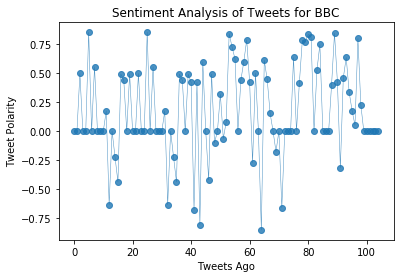

In [22]:
plt.plot(bbc_df["Compound"], marker="o", linewidth=0.5,alpha=0.8)
plt.title("Sentiment Analysis of Tweets for BBC")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

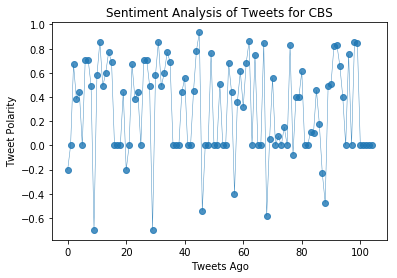

In [23]:
cbs_df = reduced_df.loc[reduced_df["User"] == "@CBS",:]
cbs_df = cbs_df.reset_index()
plt.plot(cbs_df["Compound"], marker="o", linewidth=0.5,alpha=0.8)
plt.title("Sentiment Analysis of Tweets for CBS")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

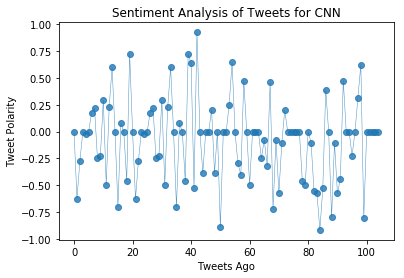

In [24]:
cnn_df = reduced_df.loc[reduced_df["User"] == "@CNN",:]
cnn_df = cnn_df.reset_index()
plt.plot(cnn_df["Compound"], marker="o", linewidth=0.5,alpha=0.8)
plt.title("Sentiment Analysis of Tweets for CNN")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

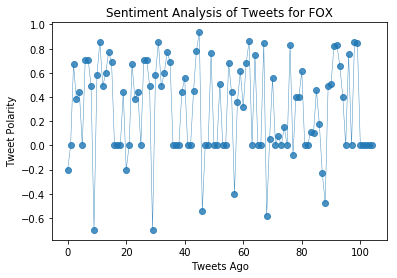

In [25]:
fox_df = reduced_df.loc[reduced_df["User"] == "@FOX",:]
fox_df = fox_df.reset_index()
plt.plot(cbs_df["Compound"], marker="o", linewidth=0.5,alpha=0.8)
plt.title("Sentiment Analysis of Tweets for FOX")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

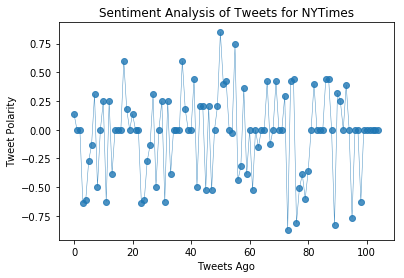

In [26]:
nytimes_df = reduced_df.loc[reduced_df["User"] == "@nytimes",:]
nytimes_df = nytimes_df.reset_index()
plt.plot(nytimes_df["Compound"], marker="o", linewidth=0.5,alpha=0.8)
plt.title("Sentiment Analysis of Tweets for NYTimes")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [27]:

target_users = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]
overall_positive_list = []
overall_negative_list = []
overall_neutral_list = []
overall_compound_list = []
overall_sentiments = []

for user in target_users:
    counter = 0
    for page in range(5):
        all_tweets = api.user_timeline(user)
        for tweet in all_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            #print (results)
            overall_compound_list = np.mean([compound])
            overall_positive_list = np.mean([pos])
            overall_neutral_list = np.mean([neu])
            overall_negative_list = np.mean([neg])
        counter = len(all_tweets)+counter
    overall_sentiments.append({"User": [user][0], "Compound": [overall_compound_list][0],"Positive": [overall_positive_list][0],"Neutral": [overall_neutral_list][0], "Negative": [overall_negative_list][0], "Tweet Count": counter})
      
print (overall_sentiments)
    


[{'User': '@BBC', 'Compound': 0.4926, 'Positive': 0.175, 'Neutral': 0.825, 'Negative': 0.0, 'Tweet Count': 100}, {'User': '@CBS', 'Compound': 0.4404, 'Positive': 0.116, 'Neutral': 0.884, 'Negative': 0.0, 'Tweet Count': 100}, {'User': '@CNN', 'Compound': -0.4588, 'Positive': 0.0, 'Neutral': 0.85, 'Negative': 0.15, 'Tweet Count': 100}, {'User': '@Fox', 'Compound': 0.4588, 'Positive': 0.167, 'Neutral': 0.833, 'Negative': 0.0, 'Tweet Count': 100}, {'User': '@nytimes', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 100}]


In [28]:
overall_sentiments = pd.DataFrame(overall_sentiments)
overall_sentiments

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.4926,0.00,0.825,0.175,100,@BBC
1,0.4404,0.00,0.884,0.116,100,@CBS
2,-0.4588,0.15,0.850,0.000,100,@CNN
3,0.4588,0.00,0.833,0.167,100,@Fox
4,0.0000,0.00,1.000,0.000,100,@nytimes


In [29]:
user = []
score = []
user = overall_sentiments["User"]
compound = overall_sentiments["Compound"]

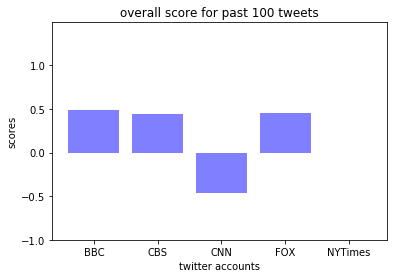

In [30]:
x_axis = np.arange(len(compound))
plt.bar(x_axis, compound, color='blue', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYTimes"])
plt.xlim(-0.25, len(x_axis))
plt.ylim(-1, max(compound)+1)
plt.title("overall score for past 100 tweets")
plt.xlabel("twitter accounts")
plt.ylabel("scores")
#plt.savefig("overall_score.png")
plt.show()